# Car Insurance Claim Classification

By: Mohamed Fawzy

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.exceptions import NotFittedError
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import joblib

sns.set(rc={'figure.figsize':(12, 10)}, font_scale=1.2)

In [2]:
# Read the dataset
df = pd.read_csv('Car Insurance Claim.csv')

### Describing Data:

In [3]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Data Exploration:

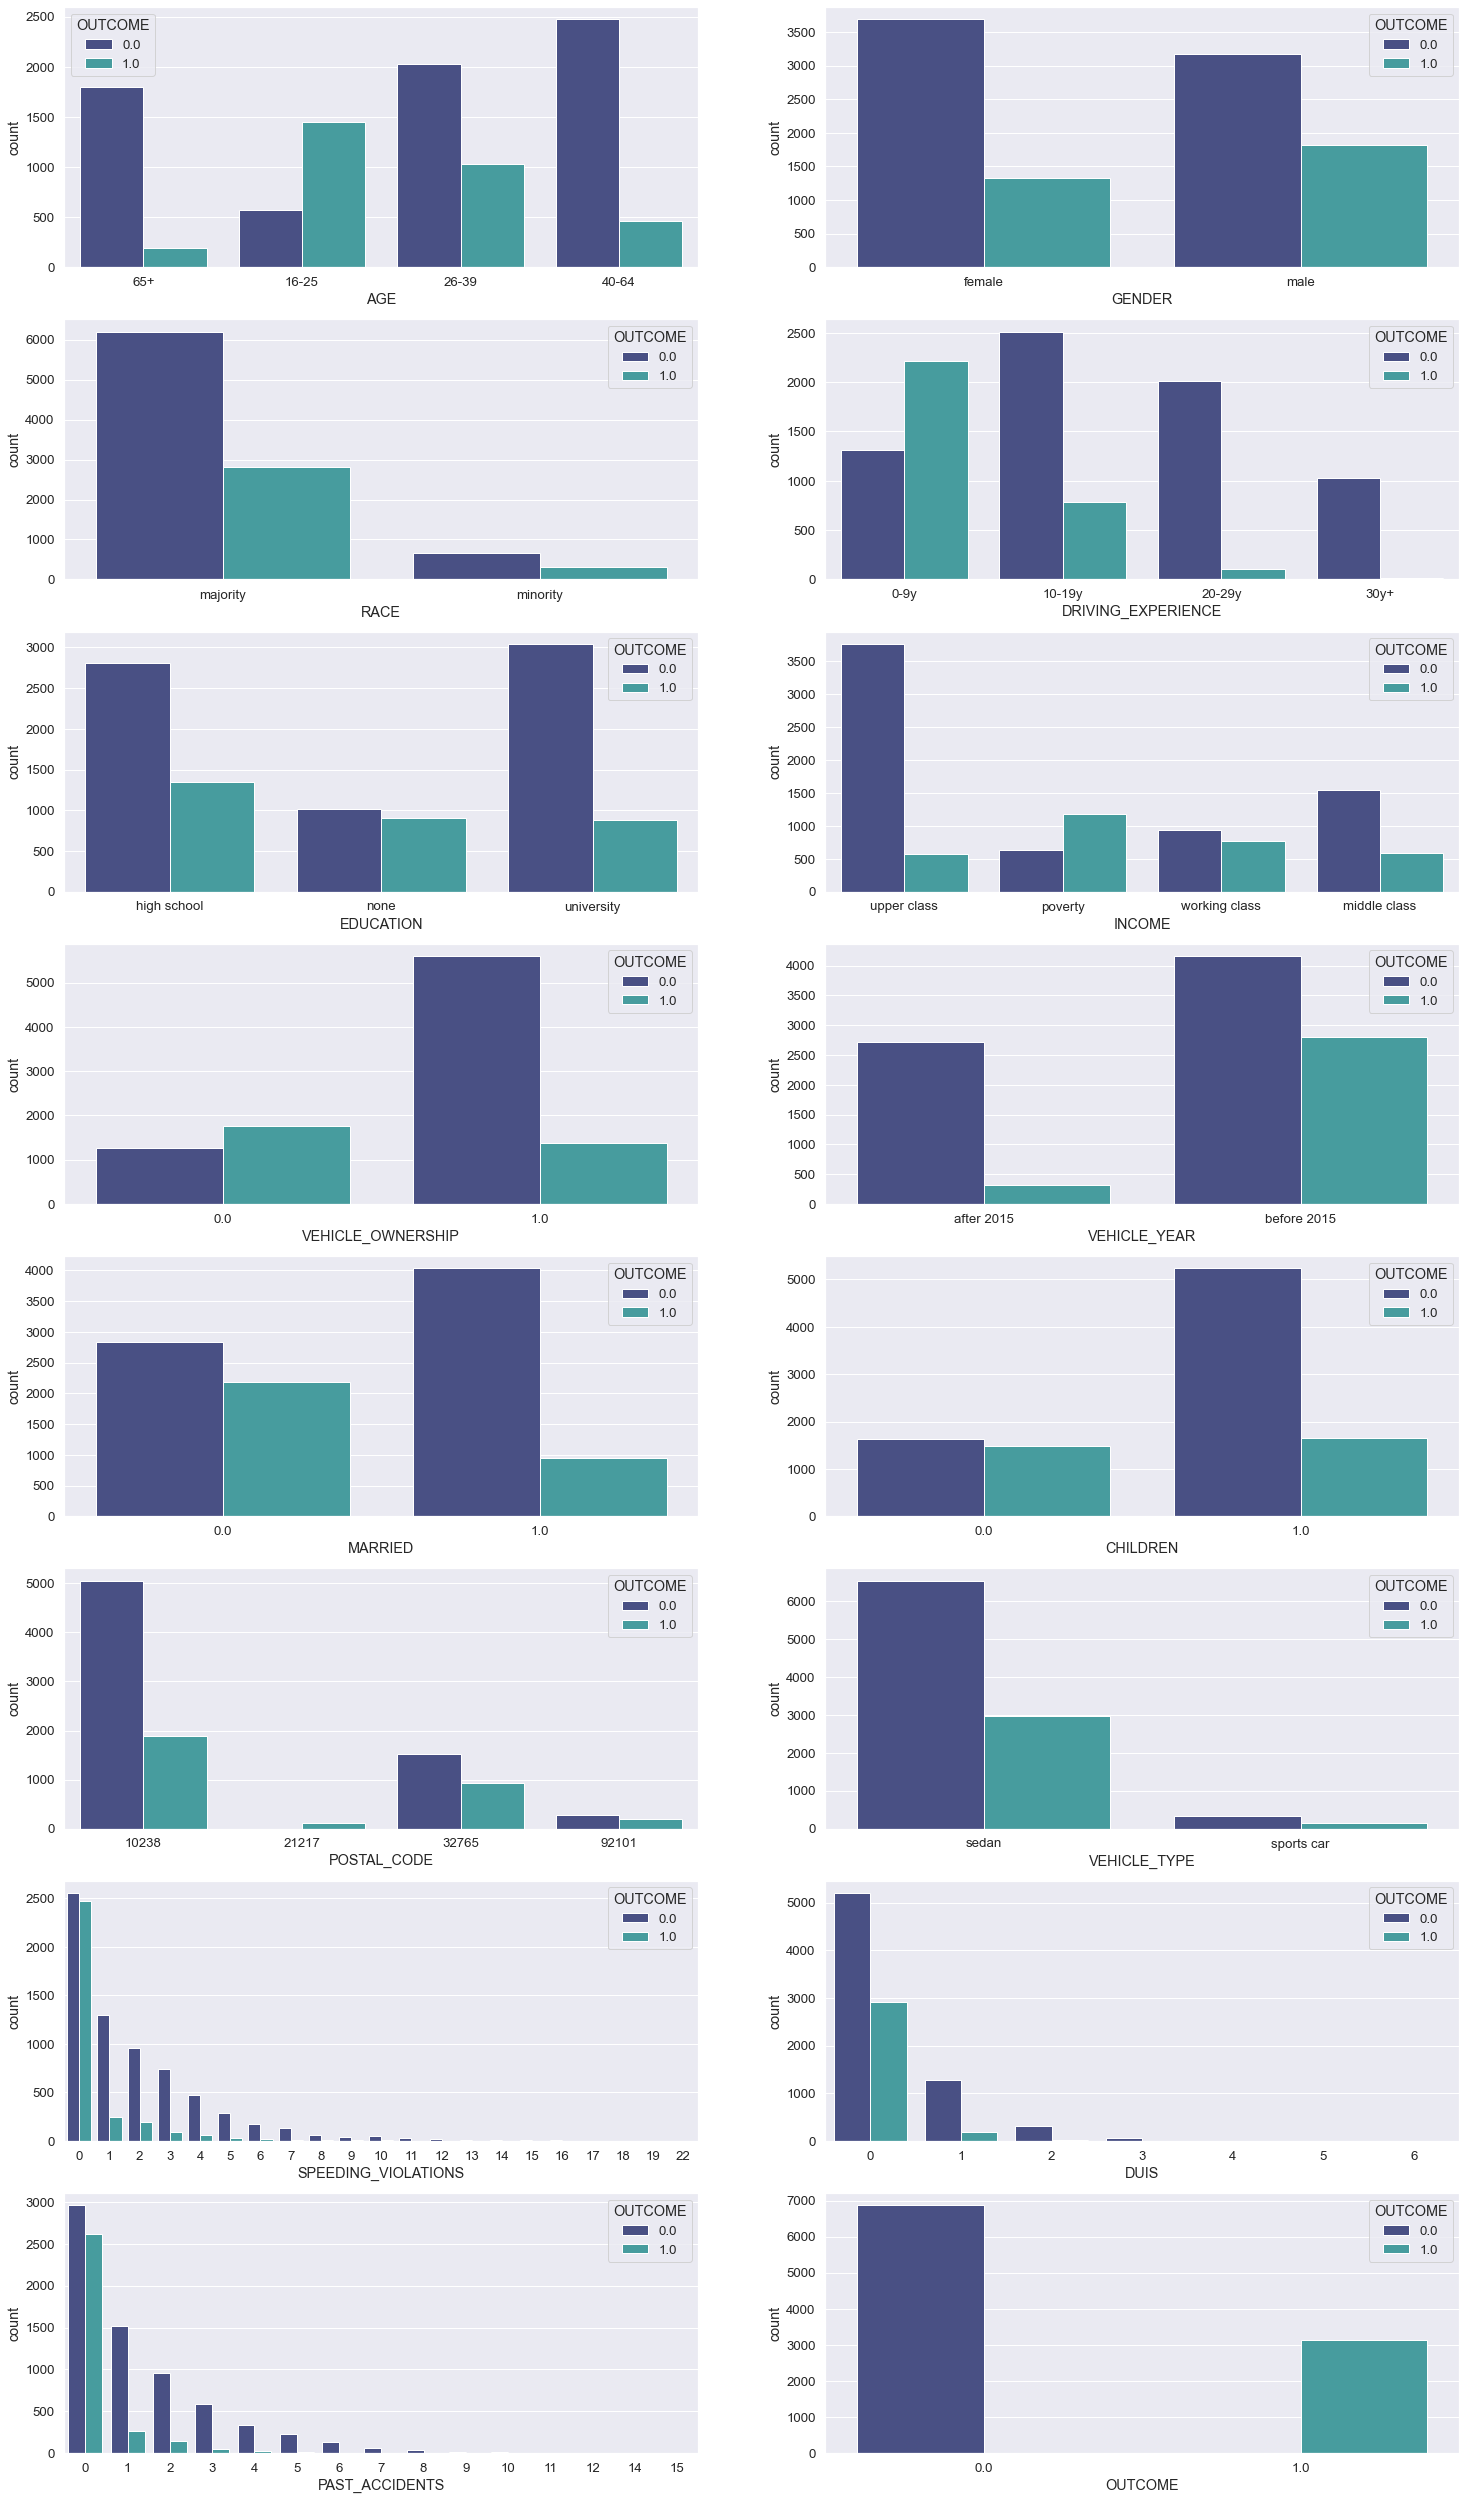

In [6]:
fig, ax = plt.subplots(8, 2, figsize=(25, 45))

features = [
    ['AGE', 'GENDER'],
    ['RACE', 'DRIVING_EXPERIENCE'],
    ['EDUCATION', 'INCOME'],
    ['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR'],
    ['MARRIED', 'CHILDREN'],
    ['POSTAL_CODE', 'VEHICLE_TYPE'],
    ['SPEEDING_VIOLATIONS', 'DUIS'],
    ['PAST_ACCIDENTS', 'OUTCOME']
    ]

for i in range(8):
    for j in range(2):
        try:
            col = features[i][j]
            sns.countplot(data=df, x=col, ax=ax[i][j], hue='OUTCOME', palette='mako')
        except:
            pass

<AxesSubplot: xlabel='CREDIT_SCORE', ylabel='Density'>

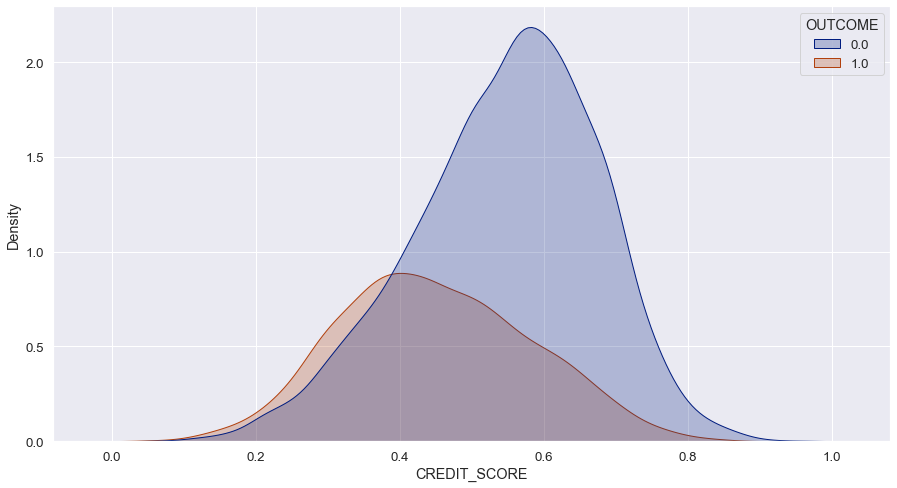

In [7]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', palette='dark', fill=True)

<AxesSubplot: xlabel='ANNUAL_MILEAGE', ylabel='count'>

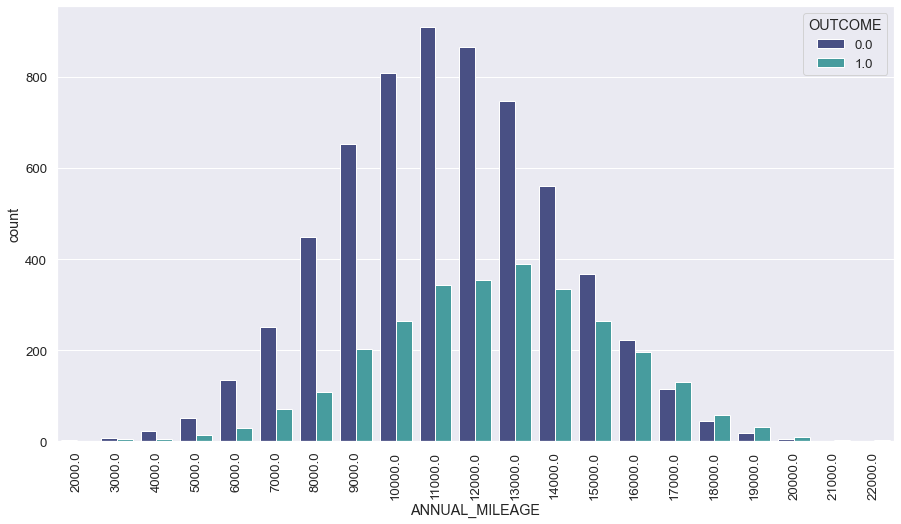

In [8]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.countplot(data=df, x='ANNUAL_MILEAGE', hue='OUTCOME', palette='mako')

## Data Preprocessing:

- Drop `ID`

In [9]:
df.drop(columns=['ID'], inplace=True)

- Check for duplicate rows

In [10]:
df.duplicated().sum()

12

In [11]:
df.drop_duplicates(inplace=True)

- Handle values in `AGE`

In [12]:
def age_range(x):
    if '-' in x:
        return (int(x.split('-')[0])+int(x.split('-')[1]))/2
    else:
        return int(x[:-1])

df['AGE'] = df['AGE'].apply(age_range)

- Handle values in `DRIVING_EXPERIENCE`

In [13]:
def driving_experience(x):
    x = x.split('y')[0]
    if '-' in x:
        return (int(x.split('-')[0])+int(x.split('-')[1]))/2
    else:
        return int(x)

df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].apply(driving_experience)

- Handle values in `POSTAL_CODE`

In [14]:
'''
postal_code = list(df['POSTAL_CODE'].unique())
print(postal_code)
'''

[10238, 32765, 92101, 21217]


In [15]:
'''
country = []

for i in postal_code:
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(i)
    data = location.raw
    loc_data = data['display_name'].split(',')
    country.append(loc_data[-1].strip())

print(country)
'''

['Lietuva', 'España', 'United States', 'Hrvatska']


In [16]:
'''
country_map = {
    postal_code[0]:country[0],
    postal_code[1]:country[1],
    postal_code[2]:country[2],
    postal_code[3]:country[3]
}

df['COUNTRY'] = df['POSTAL_CODE'].map(country_map)
'''

In [17]:
'''
def country(x):
    if x == 'Lietuva':
        return 'Lithuania'
    elif x == 'España':
        return 'Spain'
    elif x == 'Hrvatska':
        return 'Croatia'
    else:
        return x

df['COUNTRY'] = df['COUNTRY'].apply(country)
'''

- Drop illogical rows from data

In [14]:
df.drop(df[(df['OUTCOME'] == 1.0) & ((df['CREDIT_SCORE'].isnull()) | (df['ANNUAL_MILEAGE'].isnull()))].index, axis=0, inplace=True)

- `GENDER`, `AGE`, `DRIVING_EXPERIENCE`, `INCOME`, `RACE`, `VEHICLE_YEAR`, `VEHICLE_TYPE`, `EDUCATION`, `POSTAL_CODE` should be converted to numerical

In [15]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER']).astype('int64')

In [16]:
age_map = {
    20.5:3,
    32.5:2,
    52.0:1,
    65:0
}

driving_experience_map = {
    4.5:3,
    14.5:2,
    24.5:1,
    30:0
}

income_map = {
    'upper class':3,
    'middle class':2,
    'working class':1,
    'poverty':0
}

race_map = {
    'majority':1,
    'minority':0
}

vehicle_year_map = {
    'after 2015':1,
    'before 2015':0
}

vehicle_type_map = {
    'sedan':1,
    'sports car':0
}

In [17]:
df['AGE'] = df['AGE'].map(age_map)
df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].map(driving_experience_map)
df['INCOME'] = df['INCOME'].map(income_map)
df['RACE'] = df['RACE'].map(race_map)
df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].map(vehicle_year_map)
df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].map(vehicle_type_map)

In [18]:
df = pd.get_dummies(df, columns=['EDUCATION'], prefix='EDUCATION', prefix_sep='.', drop_first=True, dtype='int64')
df = pd.get_dummies(df, columns=['POSTAL_CODE'], prefix='POSTAL_CODE', prefix_sep='.', drop_first=True, dtype='int64')

- `VEHICLE_OWNERSHIP`, `MARRIED`, `CHILDREN`, `OUTCOME` should be converted to integer

In [19]:
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype('int64')
df['MARRIED'] = df['MARRIED'].astype('int64')
df['CHILDREN'] = df['CHILDREN'].astype('int64')
df['OUTCOME'] = df['OUTCOME'].astype('int64')

### EDA Results:

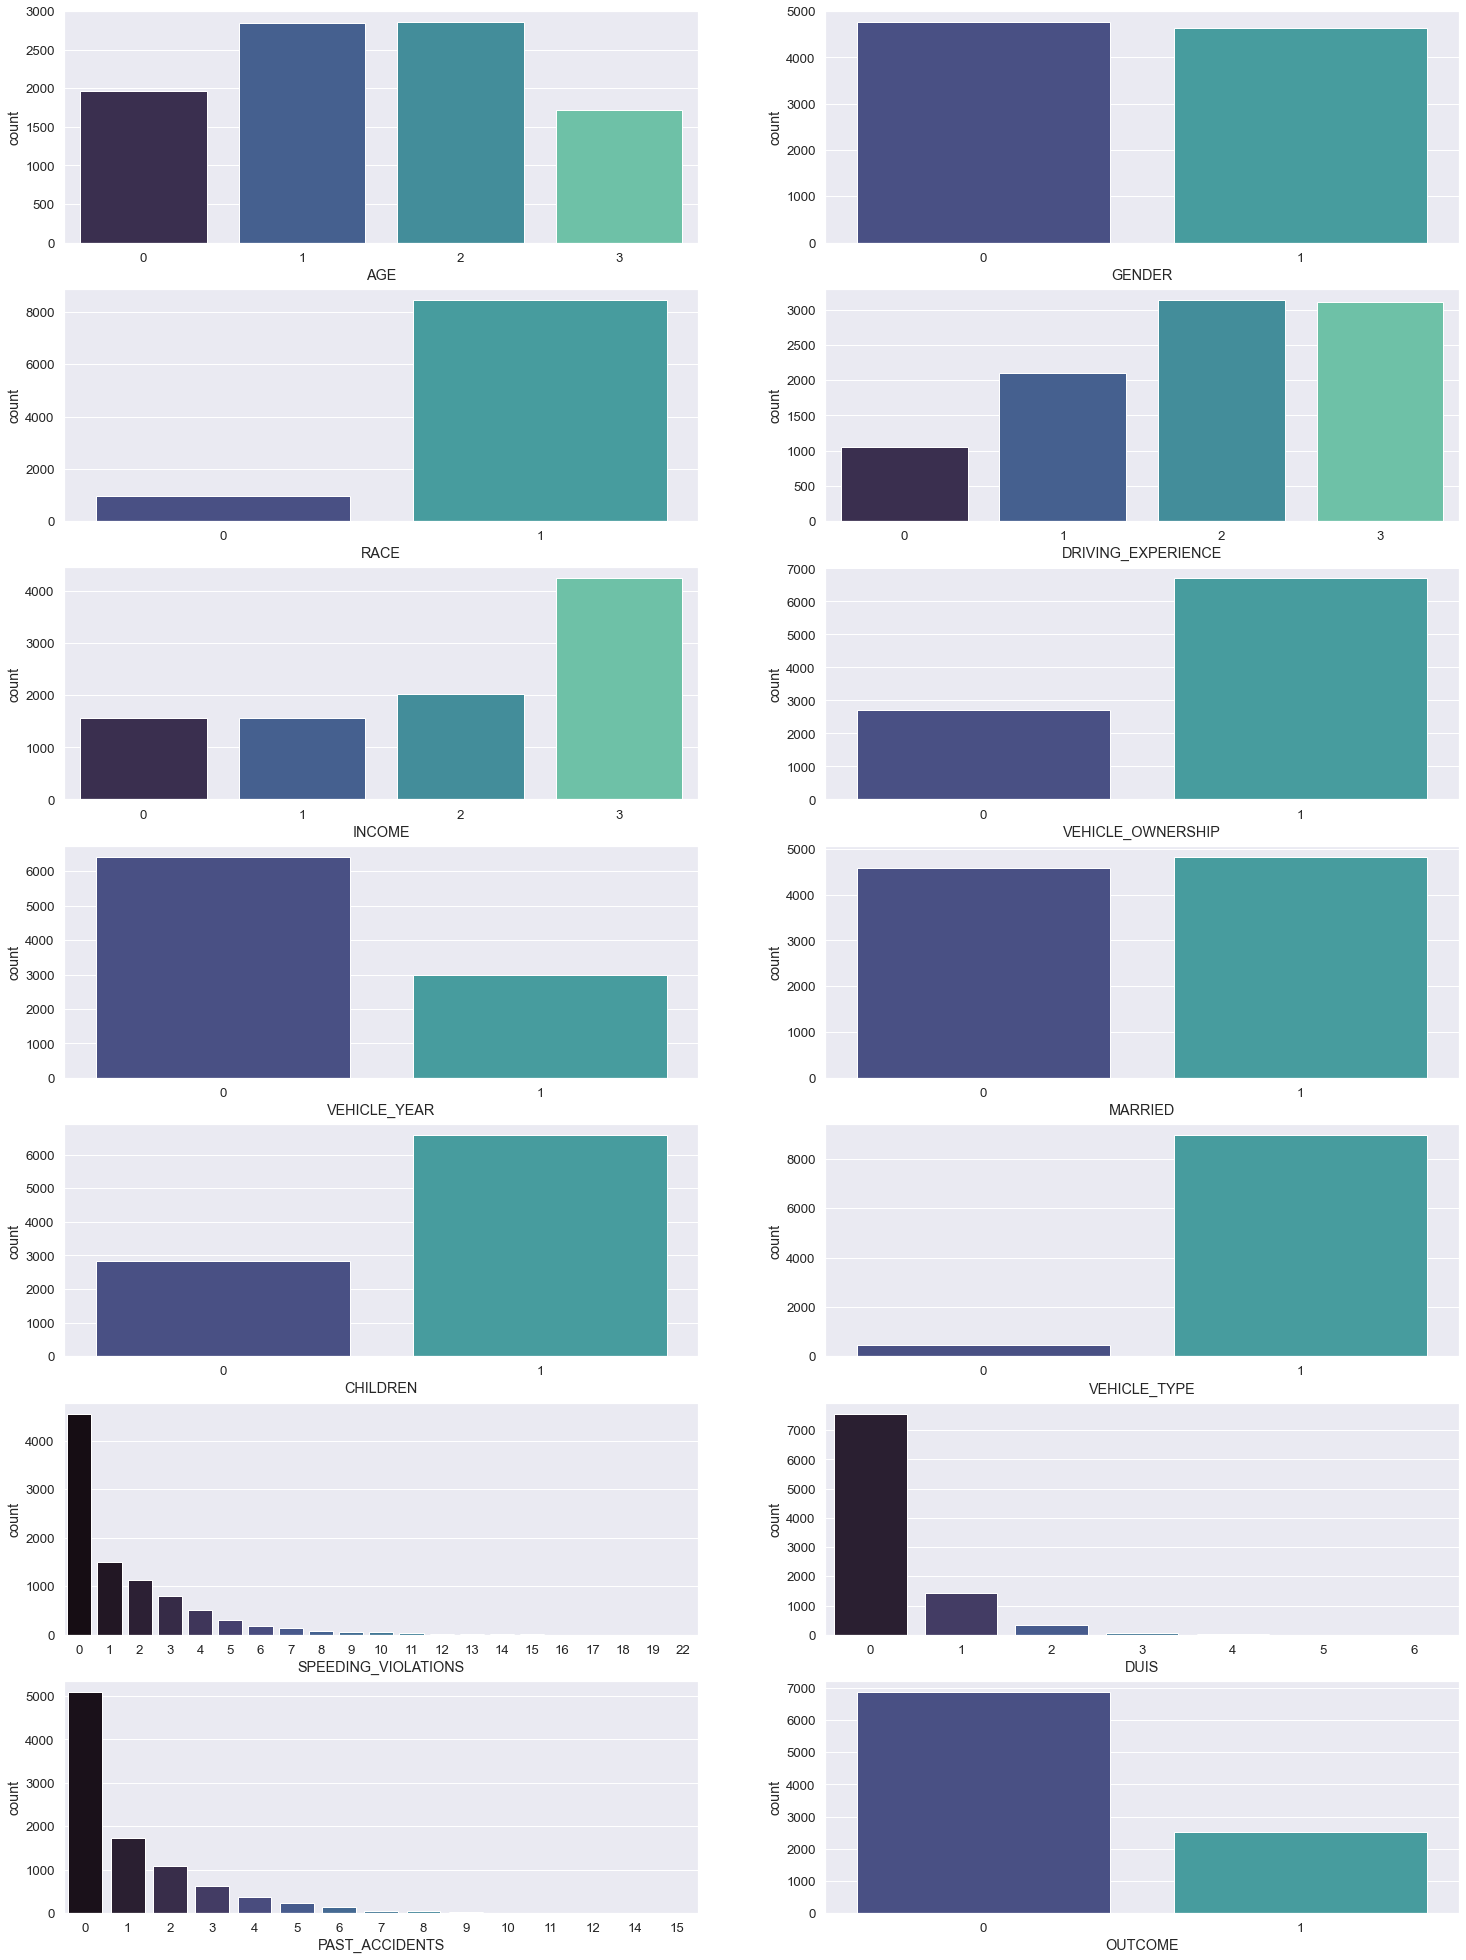

In [20]:
fig, ax = plt.subplots(7, 2, figsize=(25, 35))

features = [
    ['AGE', 'GENDER'],
    ['RACE', 'DRIVING_EXPERIENCE'],
    ['INCOME', 'VEHICLE_OWNERSHIP'],
    ['VEHICLE_YEAR', 'MARRIED'],
    ['CHILDREN', 'VEHICLE_TYPE'],
    ['SPEEDING_VIOLATIONS', 'DUIS'],
    ['PAST_ACCIDENTS', 'OUTCOME']
    ]

for i in range(7):
    for j in range(2):
        try:
            col = features[i][j]
            sns.countplot(data=df, x=col, ax=ax[i][j], palette='mako')
        except:
            pass

<AxesSubplot: xlabel='CREDIT_SCORE', ylabel='Density'>

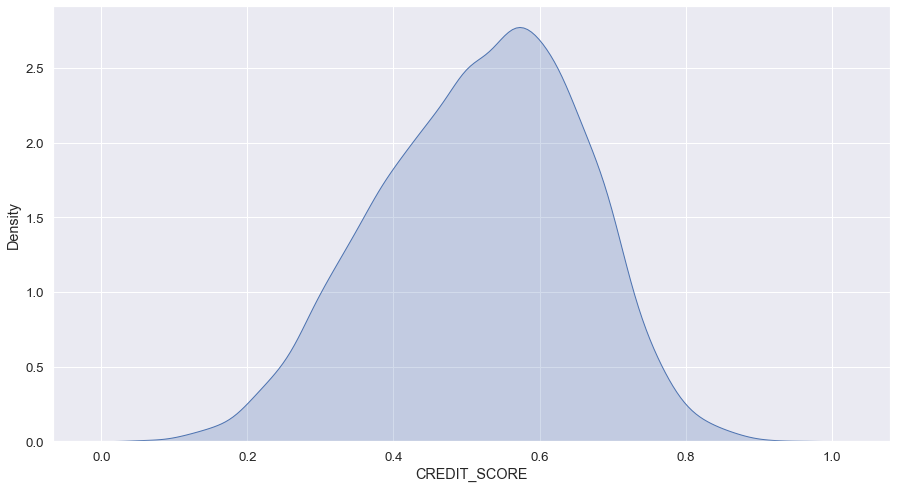

In [21]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x='CREDIT_SCORE', fill=True)

<AxesSubplot: xlabel='ANNUAL_MILEAGE', ylabel='count'>

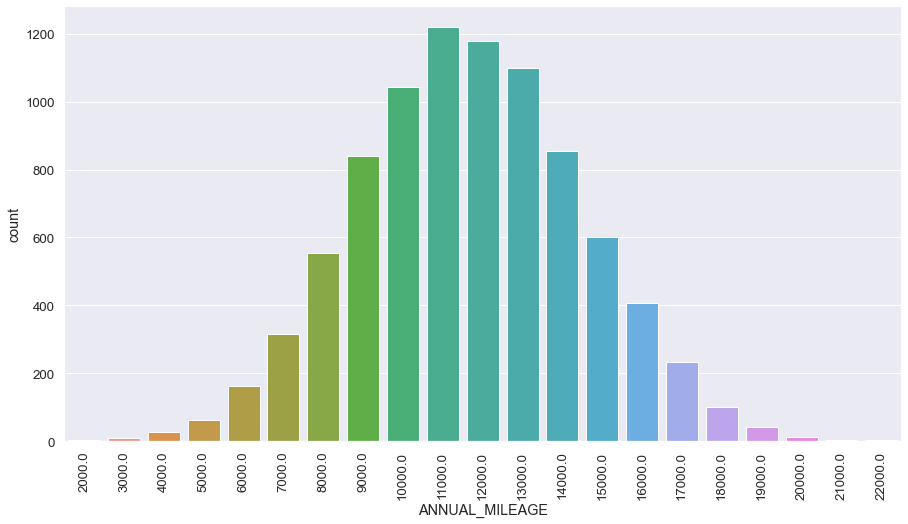

In [22]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.countplot(data=df, x='ANNUAL_MILEAGE')

### Feature Selection:

- Get correlations between the features

In [23]:
features = df[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
            'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']]

<AxesSubplot: >

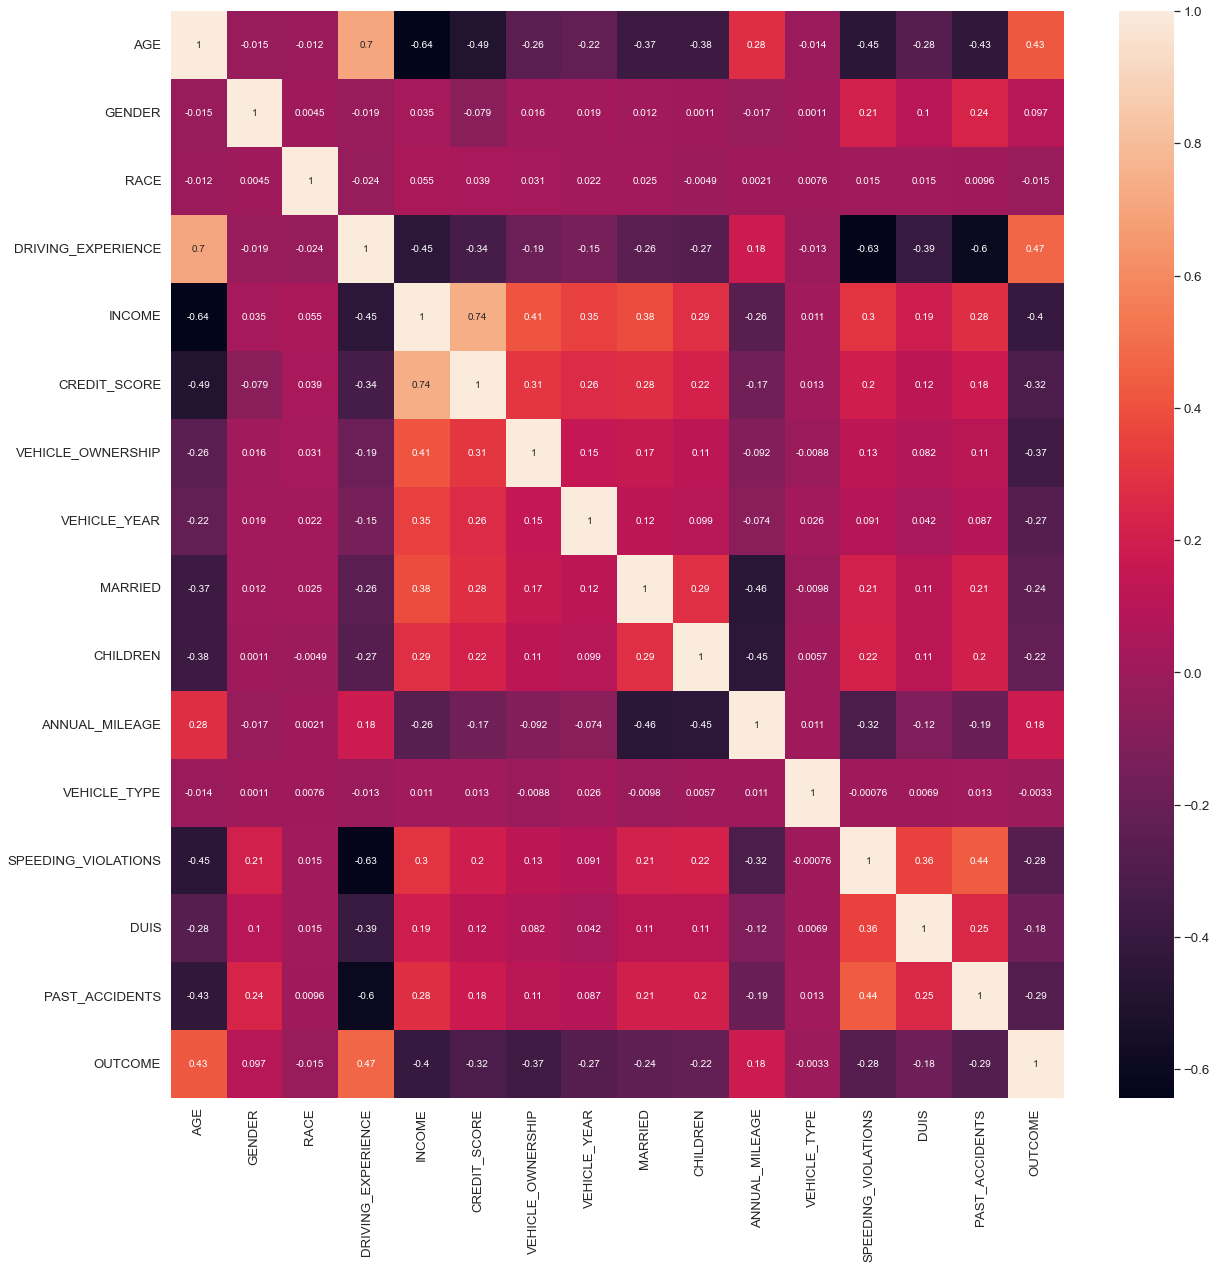

In [24]:
corr = features.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

- Drop `VEHICLE_TYPE`, `RACE`

In [25]:
#df.drop(columns=['VEHICLE_TYPE'], inplace=True)
df.drop(columns=['RACE'], inplace=True)

### Feature Engineering:

- Create `PROFESSIONALITY` feature

In [26]:
df[((df['AGE'] == 0) | (df['AGE'] == 1)) & (df['DRIVING_EXPERIENCE'] == 0)]

,AGE,GENDER,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,EDUCATION.none,EDUCATION.university,POSTAL_CODE.21217,POSTAL_CODE.32765,POSTAL_CODE.92101
6,0,1,0,3,0.492944,0,1,1,1,13000.0,1,7,0,3,0,0,0,0,0,0
10,0,1,0,3,0.620361,1,1,1,1,10000.0,1,6,2,7,0,0,0,0,0,0
11,0,0,0,3,0.729831,1,1,1,0,12000.0,1,4,0,0,0,0,0,0,1,0
16,0,1,0,3,0.796175,1,0,1,1,NaN,1,10,2,1,0,0,1,0,1,0
24,0,1,0,3,0.500631,1,0,1,1,7000.0,1,13,2,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,0,1,0,3,0.465451,1,1,1,1,7000.0,1,5,0,15,0,0,1,0,0,0
9929,0,0,0,3,0.765637,1,0,1,1,6000.0,1,6,0,1,0,0,1,0,1,0
9943,0,1,0,3,0.469432,1,1,1,1,7000.0,0,14,0,5,0,0,1,0,0,0
9951,0,0,0,2,0.584713,1,1,1,1,7000.0,1,5,2,0,0,0,0,0,1,0


In [27]:
def professionality(x, y):
    if x == 0:
        if y == 0 or y == 1:
            return 1
    else:
        return 0

In [28]:
df['PROFESSIONALITY'] = df.apply(lambda x: professionality(x['DRIVING_EXPERIENCE'], x['AGE']), axis=1)
#df['PROFESSIONALITY'] = df.apply(professionality, args=(df['DRIVING_EXPERIENCE'], df['AGE']), axis=1)

- The correlation between `PROFESSIONALITY` & `OUTCOME`

In [29]:
df[['PROFESSIONALITY', 'OUTCOME']].corr()
#sns.heatmap(df[['PROFESSIONALITY', 'OUTCOME']].corr(), annot=True)

,PROFESSIONALITY,OUTCOME
PROFESSIONALITY,1.000000,-0.203129
OUTCOME,-0.203129,1.000000


### Splitting Data:

In [30]:
x = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=19)

### Training Data:

- Fill missing values in `CREDIT_SCORE`, `ANNUAL_MILEAGE`

In [32]:
imputer = KNNImputer(n_neighbors=10)
x_train['CREDIT_SCORE'] = imputer.fit_transform(x_train[['CREDIT_SCORE']])
x_train['ANNUAL_MILEAGE'] = imputer.fit_transform(x_train[['ANNUAL_MILEAGE']])

- `Annual_Mileage` should be converted to integer

In [33]:
x_train['ANNUAL_MILEAGE'] = x_train['ANNUAL_MILEAGE'].astype('int64')

- Make `CREDIT_SCORE` normally distributed

In [34]:
power = PowerTransformer()
x_train['CREDIT_SCORE'] = power.fit_transform(x_train[['CREDIT_SCORE']])

- Standardize the data

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

- Balancing `OUTCOME` column

In [36]:
x_train, y_train = SMOTE(random_state=44).fit_resample(x_train, y_train)

### Testing Data:

- Fill missing values in `CREDIT_SCORE`, `ANNUAL_MILEAGE`

In [37]:
x_test['CREDIT_SCORE'] = imputer.transform(x_test[['CREDIT_SCORE']])
x_test['ANNUAL_MILEAGE'] = imputer.transform(x_test[['ANNUAL_MILEAGE']])

- `Annual_Mileage` should be converted to integer

In [38]:
x_test['ANNUAL_MILEAGE'] = x_test['ANNUAL_MILEAGE'].astype('int64')

- Make `CREDIT_SCORE` normally distributed

In [39]:
x_test['CREDIT_SCORE'] = power.transform(x_test[['CREDIT_SCORE']])

- Standardize the data

In [40]:
x_test = scaler.transform(x_test)

- Balancing `OUTCOME` column

In [41]:
x_test, y_test = SMOTE(random_state=44).fit_resample(x_test, y_test)

### Dimensionality Reduction:

In [ ]:
#features = list(x.columns)
#target = 'OUTCOME'

In [ ]:
#x_train = pd.DataFrame(x_train, columns = features)
#y_train = pd.DataFrame(y_train, columns = [target])
#train = pd.concat([x_train, y_train], axis=1)

In [ ]:
#x_test = pd.DataFrame(x_test, columns = features)
#y_test = pd.DataFrame(y_test, columns = [target])
#test = pd.concat([x_test, y_test], axis=1)

In [ ]:
#df = pd.concat([train, test], axis=0, ignore_index=True)

In [ ]:
#features_name = df.drop('OUTCOME', axis=1).columns

In [ ]:
#features_value = df.drop('OUTCOME', axis=1)
#features_value.head()

In [ ]:
#scaler = StandardScaler()
#features_value = scaler.fit_transform(features_value)
#features_value

In [ ]:
#pca = PCA(n_components=20)
#pca.fit(features_value)

In [ ]:
#pca.explained_variance_

In [ ]:
#plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')

In [ ]:
#pca.explained_variance_ratio_

In [ ]:
#plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')

In [ ]:
#principal_components = pca.transform(features_value)
#principal_components

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(principal_components, df['OUTCOME'], test_size=0.15, random_state=19)

### Machine Learning Models:

- Modeling (using grid search)

In [42]:
models={'Bagging':BaggingClassifier(),
        'XGBoost':XGBClassifier(),
        'LightGBM':LGBMClassifier(),
        'CatBoost':CatBoostClassifier()}

In [43]:
HyperGrid = {'Bagging':dict(random_state=[25], n_estimators=[60, 80], max_features=[0.8, 0.9]),
             'XGBoost':dict(random_state=[42], n_estimators=[50, 60, 70], max_depth=[4, 5], learning_rate=[0.4, 0.8]),
             'LightGBM':dict(random_state=[42], n_estimators=[60, 80], num_leaves=[10, 15], max_depth=[3, 5], learning_rate=[0.2, 0.4]),
             'CatBoost':dict(random_state=[73], iterations=[50, 51, 52, 53], max_depth=[2, 5], learning_rate=[0.2, 0.4], silent=[True])}

In [44]:
model_name = []
fitted_model={}
best_models_predictions = {}

for model in models.keys():

    try:
        GS=GridSearchCV(estimator=models[model], param_grid=HyperGrid[model], cv=10, scoring='accuracy')
        GS.fit(x_train, y_train)
        model_name.append(model)
        fitted_model[model] = GS

        train_acc = GS.score(x_train, y_train)
        test_acc = GS.score(x_test, y_test)

        print(" ".join(["For", model, "Algorithm..."]), "\n")
        print("Best train score is %f" % train_acc, "Best test score is %f" % test_acc, "Best parameters are %s" % GS.best_params_, sep="\n")
        print()

        for model in fitted_model.keys():

            print("Train Classification Report\n")
            best_models_predictions[model]=fitted_model[model].best_estimator_.predict(x_train)
            print(classification_report(best_models_predictions[model],y_train))
            print("Test Classification Report\n")
            best_models_predictions[model]=fitted_model[model].best_estimator_.predict(x_test)
            print(classification_report(best_models_predictions[model],y_test))
        
        print("------------------------------------------------------------\n")

        fitted_model={}
    
    except NotFittedError as e:
        print(repr(e))

For Bagging Algorithm... 

Best train score is 0.998799
Best test score is 0.902122
Best parameters are {'max_features': 0.8, 'n_estimators': 80, 'random_state': 25}

Train Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5815
           1       1.00      1.00      1.00      5839

    accuracy                           1.00     11654
   macro avg       1.00      1.00      1.00     11654
weighted avg       1.00      1.00      1.00     11654

Test Classification Report

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1042
           1       0.90      0.90      0.90      1032

    accuracy                           0.90      2074
   macro avg       0.90      0.90      0.90      2074
weighted avg       0.90      0.90      0.90      2074

------------------------------------------------------------

For XGBoost Algorithm... 

Best train score is 0.926978
Best

- Modeling (using pipeline)

In [45]:
pipelines = []
pipelines.append(('Bagging', Pipeline([('Bagging', BaggingClassifier(random_state=53, n_estimators=80, max_features=0.7))])))
pipelines.append(('XGBoost', Pipeline([('XGBoost', XGBClassifier(random_state=42, n_estimators=60, max_depth=4, learning_rate=0.4))])))
pipelines.append(('LightGBM', Pipeline([('LightGBM', LGBMClassifier(random_state=42, n_estimators=80, num_leaves=15, max_depth=5, learning_rate=0.2))])))
pipelines.append(('CatBoost', Pipeline([('CatBoost', CatBoostClassifier(random_state=73, iterations=53, max_depth=5, learning_rate=0.4, silent=True))])))

In [46]:
models={'Bagging':BaggingClassifier(random_state=53, n_estimators=80, max_features=0.7),
        'XGBoost':XGBClassifier(random_state=42, n_estimators=60, max_depth=4, learning_rate=0.4),
        'LightGBM':LGBMClassifier(random_state=42, n_estimators=80, num_leaves=15, max_depth=5, learning_rate=0.2),
        'CatBoost':CatBoostClassifier(random_state=73, iterations=53, max_depth=5, learning_rate=0.4, silent=True)}

In [47]:
RSKFold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=71)

In [48]:
i = 0
model_name = []
train_results = []
test_results = []
fitted_model = {}
best_models_predictions = {}

for pipe, model in pipelines:
    
    if i < 4:

        train_crossv_results = cross_val_score(model, x_train, y_train, cv=RSKFold, scoring='accuracy')
        test_crossv_results = cross_val_score(model, x_test, y_test, cv=RSKFold, scoring='accuracy')
        train_results.append(train_crossv_results)
        test_results.append(test_crossv_results)
        model_name.append(pipe)

        train_msg = "%s: %f (%f)" % ('Train Accuracy', train_crossv_results.mean(), train_crossv_results.std())
        test_msg = "%s: %f (%f)" % ('Test Accuracy', test_crossv_results.mean(), test_crossv_results.std())
        print(" ".join(["For", model_name[i], "Algorithm..."]), "\n")
        print(train_msg, test_msg, sep='\n')
        print()

        train_fitted = models[model_name[i]].fit(x_train, y_train)
        fitted_model[model_name[i]] = train_fitted

        for model in fitted_model.keys():

            print("Train Classification Report\n")
            best_models_predictions[model]=fitted_model[model].predict(x_train)
            print(classification_report(best_models_predictions[model],y_train))
            print("Test Classification Report\n")
            best_models_predictions[model]=fitted_model[model].predict(x_test)
            print(classification_report(best_models_predictions[model],y_test))
        
        print("------------------------------------------------------------\n")

        i += 1
        fitted_model = {}

For Bagging Algorithm... 

Train Accuracy: 0.905784 (0.008353)
Test Accuracy: 0.914028 (0.023778)

Train Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5819
           1       1.00      1.00      1.00      5835

    accuracy                           1.00     11654
   macro avg       1.00      1.00      1.00     11654
weighted avg       1.00      1.00      1.00     11654

Test Classification Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1049
           1       0.89      0.90      0.90      1025

    accuracy                           0.90      2074
   macro avg       0.90      0.90      0.90      2074
weighted avg       0.90      0.90      0.90      2074

------------------------------------------------------------

For XGBoost Algorithm... 

Train Accuracy: 0.908958 (0.008347)
Test Accuracy: 0.910320 (0.016577)

Train Classification Report



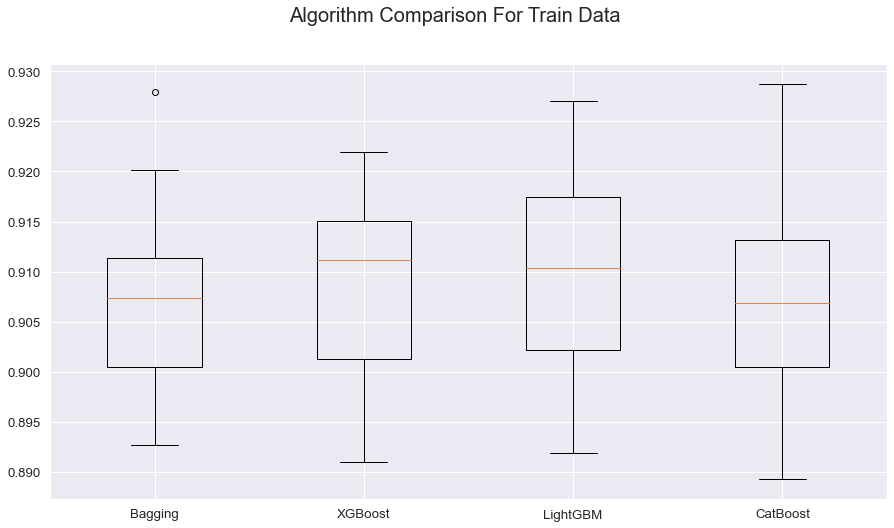

In [49]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Comparison For Train Data', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(model_name)
plt.show()

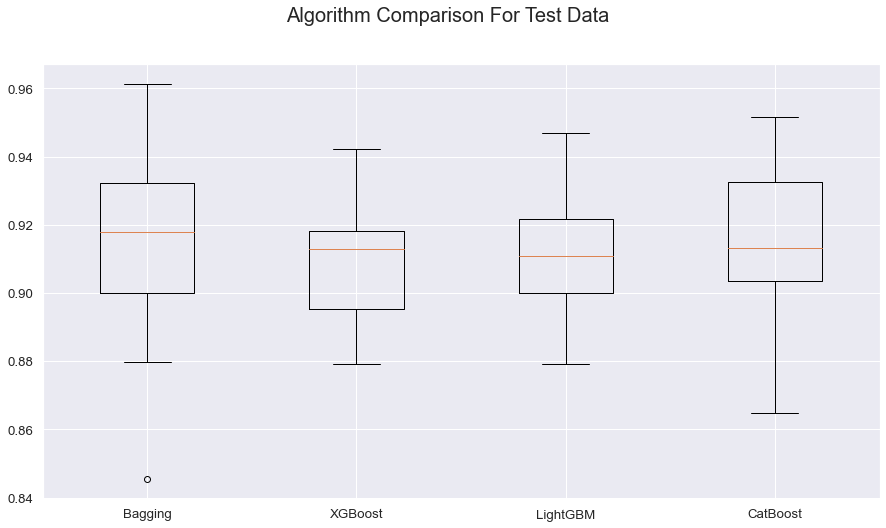

In [50]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Comparison For Test Data', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(test_results)
ax.set_xticklabels(model_name)
plt.show()

### Deployment:

- `CatBoostClassifier`

In [51]:
model = CatBoostClassifier()

parameters = {
    'random_state':[73],
    'iterations':[50, 51, 52, 53],
    'max_depth':[2, 5],
    'learning_rate':[0.2, 0.4],
    'silent':[True]
}

grid_search = GridSearchCV(model, parameters, cv=10)
grid_search.fit(x_train, y_train)

train_acc = grid_search.score(x_train, y_train)
test_acc = grid_search.score(x_test, y_test)

print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')

print(f'Best parameters: {grid_search.best_params_}')

Train Accuracy: 0.9229449116183285, Test Accuracy: 0.922854387656702
Best parameters: {'iterations': 53, 'learning_rate': 0.4, 'max_depth': 5, 'random_state': 73, 'silent': True}


In [52]:
for s, p in zip((grid_search.cv_results_['mean_test_score']), (grid_search.cv_results_['params'])):
    print(f'Mean Test Score: {s}, Parameters: {p}')

Mean Test Score: 0.8802260028415991, Parameters: {'iterations': 50, 'learning_rate': 0.2, 'max_depth': 2, 'random_state': 73, 'silent': True}
Mean Test Score: 0.8985934083731477, Parameters: {'iterations': 50, 'learning_rate': 0.2, 'max_depth': 5, 'random_state': 73, 'silent': True}
Mean Test Score: 0.8955047519489986, Parameters: {'iterations': 50, 'learning_rate': 0.4, 'max_depth': 2, 'random_state': 73, 'silent': True}
Mean Test Score: 0.9023722200546235, Parameters: {'iterations': 50, 'learning_rate': 0.4, 'max_depth': 5, 'random_state': 73, 'silent': True}
Mean Test Score: 0.8809125508874477, Parameters: {'iterations': 51, 'learning_rate': 0.2, 'max_depth': 2, 'random_state': 73, 'silent': True}
Mean Test Score: 0.8990225193059432, Parameters: {'iterations': 51, 'learning_rate': 0.2, 'max_depth': 5, 'random_state': 73, 'silent': True}
Mean Test Score: 0.897049374627316, Parameters: {'iterations': 51, 'learning_rate': 0.4, 'max_depth': 2, 'random_state': 73, 'silent': True}
Mean Te

In [53]:
GS_Results = pd.DataFrame(grid_search.cv_results_['rank_test_score'], columns=['Rank'])
GS_Results['Mean Test Score'] = grid_search.cv_results_['mean_test_score']
GS_Results['Learning Rate'] = grid_search.cv_results_['params'][0]['learning_rate']
GS_Results['Max Depth'] = grid_search.cv_results_['params'][0]['max_depth']
GS_Results['Iterations'] = grid_search.cv_results_['params'][0]['iterations']
GS_Results['Random State'] = grid_search.cv_results_['params'][0]['random_state']
GS_Results

,Rank,Mean Test Score,Learning Rate,Max Depth,Iterations,Random State
0,16,0.880226,0.2,2,50,73
1,8,0.898593,0.2,2,50,73
2,12,0.895505,0.2,2,50,73
3,4,0.902372,0.2,2,50,73
4,15,0.880913,0.2,2,50,73
5,7,0.899023,0.2,2,50,73
6,10,0.897049,0.2,2,50,73
7,2,0.902973,0.2,2,50,73
8,14,0.882114,0.2,2,50,73
9,6,0.899280,0.2,2,50,73


In [54]:
GS_Results = GS_Results.sort_values(by=['Rank'])
GS_Results

,Rank,Mean Test Score,Learning Rate,Max Depth,Iterations,Random State
15,1,0.903059,0.2,2,50,73
7,2,0.902973,0.2,2,50,73
11,3,0.902715,0.2,2,50,73
3,4,0.902372,0.2,2,50,73
13,5,0.900396,0.2,2,50,73
9,6,0.899280,0.2,2,50,73
5,7,0.899023,0.2,2,50,73
1,8,0.898593,0.2,2,50,73
14,9,0.897308,0.2,2,50,73
6,10,0.897049,0.2,2,50,73


In [55]:
GS_Results[GS_Results['Mean Test Score'] == GS_Results['Mean Test Score'].max()]

,Rank,Mean Test Score,Learning Rate,Max Depth,Iterations,Random State
15,1,0.903059,0.2,2,50,73


In [56]:
grid_search

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001666DE8CCD0>,
             param_grid={'iterations': [50, 51, 52, 53],
                         'learning_rate': [0.2, 0.4], 'max_depth': [2, 5],
                         'random_state': [73], 'silent': [True]})

In [57]:
x

,AGE,GENDER,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,EDUCATION.none,EDUCATION.university,POSTAL_CODE.21217,POSTAL_CODE.32765,POSTAL_CODE.92101,PROFESSIONALITY
0,0,0,3,3,0.629027,1,1,0,1,12000.0,1,0,0,0,0,0,0,0,0,0
1,3,1,3,0,0.357757,0,0,0,0,16000.0,1,0,0,0,1,0,0,0,0,0
2,3,0,3,1,0.493146,1,0,0,0,11000.0,1,0,0,0,0,0,0,0,0,0
3,3,1,3,1,0.206013,1,0,0,1,11000.0,1,0,0,0,0,1,0,1,0,0
4,2,1,2,1,0.388366,1,0,0,0,12000.0,1,2,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,2,3,0.582787,1,0,0,0,16000.0,1,0,0,1,0,1,0,0,0,0
9996,2,0,2,2,0.522231,1,1,0,1,NaN,1,1,0,0,1,0,0,1,0,0
9997,2,1,3,2,0.470940,1,0,0,1,14000.0,1,0,0,0,0,0,0,0,0,0
9998,2,0,2,0,0.364185,0,0,0,1,13000.0,1,2,0,1,0,0,0,0,0,0


In [58]:
age = input()
if (age == '16-25'):
    age = 3
elif (age == '26-39'):
    age = 2
elif (age == '40-64'):
    age = 1
elif (age == '65+'):
    age = 0

gender = input()
if (gender == 'male'):
    gender = 1
elif (gender == 'female'):
    gender = 0

driving_experience = input()
if (driving_experience == '0-9y'):
    driving_experience = 3
elif (driving_experience == '10-19y'):
    driving_experience = 2
elif (driving_experience == '20-29y'):
    driving_experience = 1
elif (driving_experience == '30y+'):
    driving_experience = 0

income = input()
if (income == 'upper class'):
    income = 3
elif (income == 'middle class'):
    income = 2
elif (income == 'working class'):
    income = 1
elif (income == 'poverty'):
    income = 0

credit_score = float(input())

vehicle_ownership = int(input())

vehicle_year = input()
if (vehicle_year == 'after 2015'):
    vehicle_year = 1
elif (vehicle_year == 'before 2015'):
    vehicle_year = 0

married = int(input())

children = int(input())

annual_mileage = int(input())

vehicle_type = input()
if (vehicle_type == 'sedan'):
    vehicle_type = 1
elif (vehicle_type == 'sports car'):
    vehicle_type = 0

speeding_violations = int(input())

duis = int(input())

past_accidents = int(input())

education = input()
if (education == 'university'):
    education = [0, 1]
elif (education == 'high school'):
    education = [0, 0]
elif (education == 'none'):
    education = [1, 0]

postal_code = int(input())
if (postal_code == 10238):
    postal_code = [0, 0, 0]
elif (postal_code == 32765):
    postal_code = [0, 1, 0]
elif (postal_code == 92101):
    postal_code = [0, 0, 1]
elif (postal_code == 21217):
    postal_code = [1, 0, 0]

if driving_experience == 0:
    if age == 0 or age == 1:
        professionality = 1
    else:
        professionality = 0
else:
    professionality = 0

row_data = [age, gender, driving_experience, income, credit_score, vehicle_ownership, vehicle_year, married, children, annual_mileage, vehicle_type, speeding_violations, duis, past_accidents]
row_data.extend(education)
row_data.extend(postal_code)
row_data.append(professionality)
print(row_data)

[3, 1, 3, 2, 0.564, 0, 1, 0, 0, 12050, 1, 2, 3, 1, 0, 1, 0, 0, 0, 0]


In [59]:
grid_search.predict(scaler.transform([row_data]))

array([1], dtype=int64)

In [60]:
joblib.dump(grid_search, "model.h5")
joblib.dump(power, "power.h5")
joblib.dump(scaler, "scaler.h5")

['power.h5']

In [61]:
mo = joblib.load("model.h5")
po = joblib.load("power.h5")
sc = joblib.load("scaler.h5")

In [62]:
mo.predict(sc.transform([row_data]))

array([1], dtype=int64)